In [ ]:
#Comment how to use calculator
#   Import library first, then list of constants
#   Edit list of constants to what is needed
#      If wanting to add letter, write symbols('-letter-')
#      In equation, have to wrap equation round with Eq
#      When needing to solve equation, write eqSolve = solve(-wherever stored-)
#   Run cell that is wanted with Ctrl + Enter
#   Run in order of calculations
#   Go to Kernel - Refresh and Clear All to start over

In [1]:
#   Import library
import math
import cmath
from sympy import symbols, Eq, solve
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import numpy as np


In [16]:
#   List of constants, put numbers into constants and run first
pi = math.pi
#   Prior Learning - Simple Bending Equation
#   M/I = sigma/y = E/R
diameterShaft = (0.05) #d ------------------------- meters
innerDiameterShaft = (0.04)
bendingMoment = (3.6) #M -------------------------- kNm
momentInertia = () #I
radiusCurvature = () #R
distanceFromMaxStress = () #y --------------------- meters
youngsModulus_1 = () #E

#   Prior Learning - General Torsion Equation
#   T/J = tau/r = (G*Theta)/L
torque = (2.5) #T --------------------------------- kNm
polarMomentIntertia = () #J
shaftRadius = () #r ------------------------------- meters
modulusRigidity = () #G
angleTwist = () #theta ---------------------------- degrees
shaftLength = () #L ------------------------------- meters

#   Eccentricity
eccentricity = (0.015) #--------------------------- meters
AxialLoad = (50) #--------------------------------- kN
area = () #---------------------------------------- m^2
longitudinalM = AxialLoad * eccentricity #--------- kNm
             
#   Direct Stresses
sigmax = (774640.3192) #--------------------------- kN/m^2
sigmay = (0) #------------------------------------- kN/m^2
sigmaz = () #-------------------------------------- kN/m^2

#   Shear Stresses
tauxy = (345051.3671) #---------------------------- kN/m^2
tauyx = () #--------------------------------------- kN/m^2
tauyz = () #--------------------------------------- kN/m^2
tauzy = () #--------------------------------------- kN/m^2
tauxz = () #--------------------------------------- kN/m^2
tauzx = () #--------------------------------------- kN/m^2

#   Angles
theta_degrees_init = () #-------------------------- degrees
theta_radians_init = () #-------------------------- degrees

#   Complimentary Shear Stresses Lengths Square
distanceAB = () #---------------------------------- meters
distanceAD = () #---------------------------------- meters
thickness = (0.01) #------------------------------- meters

#   Stresses in materials with two direct stresses and one shear stress
sigmatheta = () #---------------------------------- degrees
tautheta = () #------------------------------------ degrees

#   Principle Planes
#   Comment out which tan2theta you don't want (press # at start of line)
tan2theta = cmath.nan
tan2theta = 0 #------------------------------------ degrees

#   Principle Stresses
sigma1 = (222716.1375) #---------------------------- kN/m^2
sigma2 = (-133645.9578) #------------------------------- kN/m^2
sigma3 = (0) #-------------------------------------- kN/m^2

#   Maximum Shear Stress
maxShearStress1 = () #----------------------------- kN/m^2
maxShearStress2 = () #----------------------------- kN/m^2
maxShearStress3 = () #----------------------------- kN/m^2
maxShearStress = () #------------------------------ kN/m^2

#   Mohr's Stress Circle
radius = () #-------------------------------------- units
centrex = () #------------------------------------- units
centrey = 0
mohrsCircle = ()

#   Extensional Strains (usually * 10^-6)
epsilonx = () 
epsilony = () 
epsilontheta = ()

#   Shear Strain
gammaxy = ()
gammatheta = ()
gammathetaOverTwo = ()

#   Lengths of 2D quadrilateral under strain
#   If CD, AD or BD are given, put their values for AB, BC and AC respectively
lengthAB = () #------------------------------------ meters
lengthBC = () #------------------------------------ meters
lengthAC = () #------------------------------------ meters
distortAB = () #----------------------------------- meters
distortBC = () #----------------------------------- meters
distortAC = () #----------------------------------- meters

#   Princple Strains
epsilon1 = ()
epsilon2 = ()
gammamax = ()

#   Rosette Strain Gauge
#   Position of Gauges
theta1 = (0) #------------------------------------- degrees
theta2 = (45) #------------------------------------ degrees
theta3 = (90) #------------------------------------ degrees

#   Readings from Gauge
epsilona = () 
epsilonb = ()
epsilonc = ()
youngsModulus = () 
poissonsRatio = ()

#   Yield Criteria
#   Strain Energy
strainEnergy = ()
shearStrainEnergy = ()

#   Tresca and von Mises Criterion
sigmaYield = (630*10**3) #----------------------------------- kN/m^2
factorSafety = ()
sigmaEq = () #-------------------------------------- kN/m^2


In [ ]:
#   Convert your angles into radians
theta_radians = math.radians(theta_degrees)
print(theta_radians, 'degrees')

In [ ]:
#   Convert your angles out of radians
theta_degrees = math.degrees(theta_radians)
print(theta_degrees, 'degrees')

In [ ]:
#   Stresses

In [18]:
#   Prior Learning - Specifically About Hollow Cylinder Shafts

#   Axial Stress
#distanceFromMaxStress = diameterShaft/2
#momentInertia = (pi*(diameterShaft**4))/64
#sigmax =((bendingMoment*distanceFromMaxStress)/momentInertia)*10**-3
#print('The axial stress is',round(sigmax, 4), 'kNm^-2')

#   Shear Stress
#   Default Polar Moment Inertia is for hollow cylinders. Change accordingly.
shaftRadius = diameterShaft/2
polarMomentInertia = ((pi/64)*(((diameterShaft)**4)-(innerDiameterShaft)**4))
tauxy =((torque*shaftRadius)/polarMomentInertia)
print('The shear stress is',round(tauxy, 4),'kNm^-2')

#   Bending Stress
bendingStress1 = (bendingMoment*(diameterShaft/2))/polarMomentInertia
bendingMomentNew = AxialLoad * eccentricity
bendingStress2 = (bendingMomentNew*(diameterShaft/2))/polarMomentInertia
bendingStress = bendingStress1 + bendingStress2
print('The bending stress is', round(bendingStress,4), 'kNm^-2')

#   Eccentric Loading ---- bendingMomementNew used for M
area = (pi/4)*((diameterShaft**2)-(innerDiameterShaft**2))
eccentricStress1 = AxialLoad/area
eccentricStress2 = (bendingMomentNew*(diameterShaft/2))/polarMomentInertia
eccentricStress = eccentricStress1 + eccentricStress2
print('The eccentric stress is', round(eccentricStress, 4), 'kNm^-2')

#   Wrap up into sigmax
sigmax = bendingStress + eccentricStress
print('Sigma x is', round(sigmax,4), 'kNm^-2')

The shear stress is 345051.3671 kNm^-2
The bending stress is 600389.3788 kNm^-2
The eccentric stress is 174250.9404 kNm^-2
Sigma x is 774640.3192 kNm^-2


In [ ]:
#   Initialize if 2D
sigmaz = tauyz = tauxz = tauzy = tauzx = sigma3 = 0

In [ ]:
#   Complimentary Shear Stress
#   Add Values into Brackets
c = distanceAB
b = distanceAD
a = thickness
shearforceAB = tauxy * c * a
shearforceAD = tauxy * b * a
print('Shear Force on AB and CD is',shearforceAB,'MN/m^2')
print('Shear Force on AD and BC is',shearforceAD,'MN/m^2')

In [ ]:
#   Stresses in a material with two perpendicular direct stresses and 
#   a shear stress
#   Resolve forces normal to AB in static equilibrium

sigmatheta = ((sigmax + sigmay)/2) + \
(((sigmax - sigmay)/2)*(math.cos(2*(math.radians(theta_degrees_init))))) + \
(tauxy*(math.sin(2*((math.radians(theta_degrees_init))))))

print('Direct Stess at angle', theta_degrees_init,'degrees is', round(sigmatheta, 4), 'MN/m^2')

tautheta = (((sigmax - sigmay)/2)*(math.sin(2*(math.radians(theta_degrees_init)))) - \
(tauxy * (math.cos(2*(math.radians(theta_degrees_init))))))

print('Shear Stress at angle', theta_degrees_init,'degrees is',round(tautheta, 4),'MN/m^2')


In [ ]:
#   Angles of Principle Planes
#   Shear stress must be 0
#   Intialise constants list first else tan2theta will have a prexisting value
if(math.isnan(tan2theta)):
    tan2theta = (2*tauxy)/(sigmax - sigmay)
    theta_radians = (math.atan(tan2theta))/2
    print('Angles of Principle Planes are', theta_radians)
else:
    tan2theta = (2*tauxy)/(sigmax - sigmay)
    theta_radians = (math.atan(tan2theta))/2
    theta_degrees = math.degrees(theta_radians) + 90
    print('Angles of Principle Planes are', round(theta_degrees - 90, 4), 'and', round(theta_degrees, 4), 'degrees')
    


In [19]:
#   Principle Stresses

sigma1 = ((sigmax + sigmay)/2)+ (0.5*(math.sqrt(((sigmax-sigmay)**2)+ (4*tauxy*tauxy))))

sigma2 = ((sigmax + sigmay)/2) - (0.5*(math.sqrt(((sigmax-sigmay)**2)+(4*tauxy*tauxy))))

print('Principle stress 1 is', round(sigma1, 4),\
     'kN/m^2 \nPrinciple stress 2 is', round(sigma2, 4), 'kN/m^2')

Principle stress 1 is 906046.8237 kN/m^2 
Principle stress 2 is -131406.5044 kN/m^2


In [ ]:
#   Maximum Shear Stress

maxShearStress1 = abs((sigma1 - sigma2)/2)
maxShearStress2 = abs((sigma2 - sigma3)/2)
maxShearStress3 = abs((sigma3 - sigma1)/2)

if(maxShearStress1 > maxShearStress2 and maxShearStress3):
    maxShearStress = maxShearStress1
elif(maxShearStress2 > maxShearStress3 and maxShearStress1):
    maxShearStress = maxShearStress2
else:
    maxShearStress = maxShearStress3
    
print('Maximum Shear Stress is', round(maxShearStress,4), 'kN/m^2')

Calculations Without Equations


Maximum principle stress is 906046.8237 kNm^-2 
Minimum principle stress is -131406.5044 kNm^-2

Maximum shear stress is 518726.6641 kNm^-2

The angle made between the principle stresses and the axis are 20.8484 
and 110.8484 degrees


Calculations With Equations


Maximum principle stress is 906046.8237 kNm^-2 
Minimum principle stress is -131406.5044 kNm^-2

Angles of Principle Planes are 20.8484 and 110.8484 degrees

Maximum shear stress is 518726.6641 kNm^-2

The plane where the maximum shear stress acts is 65.8484 degrees


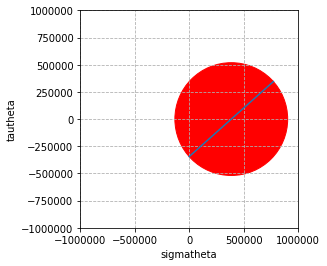

In [22]:
#   Mohr's Stress Circle

#   Circle Equation is:
#   (sigmatheta - (sigmax - sigmay)/2)^2 + tautheta^2 = 
#   0.5*(math.sqrt(((sigmax-sigmay)**2)+ (4*tauxy*tauxy)))

#   Using equations for sigmatheta and tautheta

radius = 0.5*(math.sqrt(((sigmax-sigmay)**2)+ (4*tauxy*tauxy)))
centrex = (sigmax + sigmay)/2
#   Centre y value is always 0
#   Sigmatheta plotted against tautheta for values of theta

#   In brackets are (x, y), radius, extras
mohrsCircle = plt.Circle((centrex,0), radius, color='r')

#   Plots Axis
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('sigmatheta')
ax.set_ylabel('tautheta')

#   Gives limits to axis
plt.xlim(-1000000, 1000000)
plt.ylim(-1000000, 1000000)

#   Creates Axis Grid
plt.grid(linestyle='--')

#   Draws circle
ax.add_artist(mohrsCircle)
points = plt.plot([sigmax, -sigmay],[tauxy, -tauxy])
#   Saves File
fig.savefig('plotstresscircles.png')

print('Calculations Without Equations\n')

#   Calculate without Equations

#   Principle Stresses
principleStress1 = centrex + radius
principleStress2 = centrex - radius

print('\nMaximum principle stress is', round(principleStress1, 4), \
      'kNm^-2', '\nMinimum principle stress is', round(principleStress2, 4), 'kNm^-2')

#   Maximum Shear Stress
maxShear = radius
print('\nMaximum shear stress is', round(maxShear, 4), 'kNm^-2\n')

#   Principle Plane Angles
principlePlaneAngle = (math.degrees(math.atan2(tauxy, sigmax-centrex))/2)
print('The angle made between the principle stresses and the axis are', round(principlePlaneAngle,4), \
      '\nand',round(principlePlaneAngle + 90,4), 'degrees\n\n')


print('Calculations With Equations\n')   

#   Calculate with Equations
#   Principle Stresses
sigma1 = ((sigmax + sigmay)/2)+ (0.5*(math.sqrt(((sigmax-sigmay)**2)+(4*tauxy*tauxy))))
sigma2 = ((sigmax + sigmay)/2) - (0.5*(math.sqrt(((sigmax-sigmay)**2)+(4*tauxy*tauxy))))
sigmaMax = max(sigma1, sigma2)
sigmaMin = min(sigma1, sigma2)

#print('Principle stress 1 is', round(sigma1, 4),'kN/m^2 \nPrinciple stress 2 is', round(sigma2, 4), 'kN/m^2')
print('\nMaximum principle stress is', round(sigmaMax, 4),'kNm^-2 \nMinimum principle stress is', round(sigmaMin, 4), 'kNm^-2')


#   Plane of Principle Stresses
tan2theta = (2*tauxy)/(sigmax - sigmay)
theta_radians = (math.atan(tan2theta))/2
theta_degrees = math.degrees(theta_radians) + 90

print('\nAngles of Principle Planes are', round(theta_degrees - 90, 4), 'and', round(theta_degrees, 4), 'degrees')

#   Maximum Shear Stress
maxShearStress = 0.5*(math.sqrt(((sigmax-sigmay)**2)+(4*tauxy**2)))
print('\nMaximum shear stress is', round(maxShearStress, 4), 'kNm^-2')

#   Maximum Shear Stress Angle
shearPlaneAngle = (math.degrees(math.atan(-(sigmax-sigmay)/(2*tauxy)))/2)


if(shearPlaneAngle < 0):
    print('\nThe plane where the maximum shear stress acts is', round(shearPlaneAngle + 90, 4), 'degrees')
else:
    print('\nThe plane where the maximum shear stress acts is', round(shearPlaneAngle, 4), 'degrees')
    

In [ ]:
#   Strain Transformation

In [ ]:
#   Epsilon Theta and Gamma Theta Calculations
epsilontheta = (((epsilonx + epsilony)/2) + \
((epsilonx - epsilony)/2)*math.cos(2*math.radians(theta_degrees_init)) + \
((gammaxy/2)*math.sin(2*math.radians(theta_degrees_init)))* 10**-6)

gammatheta = \
2*(((((epsilonx-epsilony)/2)*math.sin(2*math.radians(theta_degrees_init))) - \
((gammaxy/2)*math.cos(2*math.radians(theta_degrees_init)))))

gammathetaOverTwo = gammatheta / 2

print('Direct Strain at angle', theta_degrees_init, 'degrees is', round(epsilontheta * 10**6, 3), 'micro epsilons')
print('Shear Strain at angle', theta_degrees_init, 'degrees is', round(gammatheta * 10**6, 3), 'micro epsillons')
print('Shear Strain over 2 at angle', theta_degrees_init, 'degrees is', round(gammathetaOverTwo * 10**6, 3), 'micro epsillons')

In [ ]:
#   Deformation
lengthAC = math.sqrt(lengthAB**2 + lengthBC**2)
#   Calculations
distortAB = lengthAB * (1 + epsilonx)
distortBC = lengthBC * (1 + epsilony)
distortAC = lengthAC * (1 + epsilontheta)

print('Length AB is', lengthAB, 'units')
print('Length BC is', lengthBC, 'units')
print('Length AC is',round(lengthAC, 4), 'units')
print('Distorted Length AB is', distortAB, 'units')
print('Distort Length BC is', distortBC, 'units')
print('Distorted Length AC is', round(distortAC, 4), 'units')

In [ ]:
#   Mohr's Strain Circle

#   Circle Equation is:
#   (epsilontheta - (epsilonx + epsilony)/2)^2 + (gammatheta/2)^2 = 
#   ((epsilonx - epsilony)/2)^2 + (gammaxy/2)^2

#   Using equations for stress circle

radius = 0.5*(math.sqrt(((epsilonx-epsilony)**2)+(gammaxy**2)))
centrex = (epsilonx+epsilony)/2

#   Centre y value is always 0
#   Epsilontheta plotted against gammatheta/2 for values of theta

#   In brackets are (x, y), radius, extras
mohrsCircle = plt.Circle((centrex,0), radius, color='r')

#   Plots Axis
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.set_xlabel('epsilontheta')
ax.set_ylabel('gammatheta/2')

#   Gives limits to axis
plt.xlim(-10**-3, 10**-3)
plt.ylim(-10**-3, 10**-3)

#   Creates Axis Grid
plt.grid(linestyle='--')

#   Draws circle
ax.add_artist(mohrsCircle)

#   Saves File
fig.savefig('plotstraincircles.png')

In [ ]:
#   Principle Strains
epsilon1 = ((epsilonx + epsilony)/2) + \
0.5*(math.sqrt(((epsilonx-epsilony)**2)+(gammaxy**2)))

epsilon2 = ((epsilonx + epsilony)/2) - \
0.5*(math.sqrt(((epsilonx-epsilony)**2)+(gammaxy**2)))

gammamax = epsilon1 - epsilon2

print('Principle Direct Strain 1 is', round(epsilon1 * 10**6, 4), 'micro epsilons')
print('Principle Direct Strain 1 is', round(epsilon2 * 10**6, 4), 'micro epsilons')
print('Shear Strain is', round(gammamax * 10**6, 4), 'micro epsilons') 

In [ ]:
#   Rosette Strain Gauge



#   Rosette Analysis
gammaxyRosette = 2 * (epsilonb - ((epsilona + epsilonc)/2))
thetaStrain1 = math.degrees((math.atan(gammaxyRosette/(epsilona - epsilonc)))/2)
thetaStrain2 = thetaStrain1 + 90
principleStrain1 = ((((epsilona + epsilonc)/2) + \
(((epsilona - epsilonc)/2)*math.cos(2*math.radians(thetaStrain1)))+ \
((gammaxyRosette/2)*math.sin(2*math.radians(thetaStrain1)))))
principleStrain2 = ((((epsilona + epsilonc)/2) + \
((epsilona - epsilonc)/2)*math.cos(2*math.radians(thetaStrain2)) + \
((gammaxyRosette/2)*math.sin(2*math.radians(thetaStrain2)))))
principleStress1 = (youngsModulus/(1-(poissonsRatio**2)))*(principleStrain1 + (poissonsRatio*principleStrain2))
principleStress2 = (youngsModulus/(1-(poissonsRatio**2)))*(principleStrain2 + (poissonsRatio*principleStrain1))

print('Shear Strain is', round(gammaxyRosette * 10**6, 4), 'micro epsilons')
print('The Principle Strain Directions are', round(thetaStrain1, 4), 'degrees and', round(thetaStrain2, 4), 'degrees')
print('The Principle Strains are', round(principleStrain1 * 10**6, 4), 'micro epsilons and', round(principleStrain2 * 10**6, 4),'micro epsilons')
print('The Principle Stresses are', round(principleStress1 * 10**-6, 4), 'kNm^-2 and', round(principleStress2 * 10**-6, 4),'kNm^-2')


In [ ]:
#   Yield Criteria
#   Underlying Concepts are Principle Stresses, Max Shear Stress and
#   Strain Energy
strainEnergy = (1/(2*youngsModulus))*(((sigma1**2)+(sigma2**2)+(sigma3**2))- \
(2*poissonsRatio*((sigma1*sigma2)+(sigma2*sigma3)+(sigma1*sigma3))))

#   Shear Strain Energy
shearStrainEnergy = (1/(6*youngsModulus))* \
(((sigma1-sigma2)**2)+((sigma2-sigma3)**2)+((sigma3-sigma1)**2))

print('Strain Energy is', round(strainEnergy*10**9,4), 'nano Joules')
print('Shear Strain Energy is', round(shearStrainEnergy*10**9,4), 'nano Joules')

In [ ]:
#   Simple Tension refers to 2-D stress
#   Complex Stress System refers to 3-D stress

In [ ]:
#   Tresca Criterion (Maximum Shear Stress)

#   Under Simple Tension, sigma1 = sigmaYield, sigma2 and sigma3 = 0
#   Comment out if simple tension
#sigma2 = sigma3 = 0



#   Factor of Safety at default is 1
factorSafety = 1.2

sigmaYield = factorSafety * abs(sigma1 - sigma2)
print('The Tresca stress is', round(sigmaYield, 4), 'kNm^-2')


In [ ]:
#   von Mises (Shear Energy Criterion)
factorSafety = 1.2
sigmaEq = (math.sqrt((((sigma1-sigma2)**2)+((sigma2-sigma3)**2)+ \
((sigma3-sigma1)**2))/2)) * factorSafety
print('The von Mises stress is', round(sigmaEq, 4), 'Nm^-2')

if(sigmaEq == sigmaYield):
    print('Material Yields')
elif(sigmaEq < sigmaYield):
    print('Material is Elastic')
else:
    print('Calculation error')

In [ ]:
#   Plots of intersections to make Tresca graph (not von Mises)

sigmaYield = 630000

fig, ax = plt.subplots()
ax.set_xlabel('sigma1')
ax.set_ylabel('sigma2')

plt.xlim(-7*10**5, 7*10**5)
plt.ylim(-7*10**5, 7*10**5)

plt.plot(sigmaYield, 0, 'x')
plt.plot(sigmaYield, sigmaYield, 'x')
plt.plot(0, sigmaYield, 'x')
plt.plot(-sigmaYield, 0, 'x')
plt.plot(-sigmaYield, -sigmaYield, 'x')
plt.plot(0, -sigmaYield, 'x')
plt.plot([sigmaYield, sigmaYield, 0, -sigmaYield, -sigmaYield, 0, sigmaYield],\
         [0, sigmaYield, sigmaYield, 0, -sigmaYield, -sigmaYield, 0])


print(sigmaYield)
